In [3]:
import pandas as pd

In [4]:
house_df = pd.read_csv("Week 11_Graded Mini Project_Dataset_houseprice.csv")

## Task 1: Data Cleaning and Preprocessing

### 1.1 Handling Missing Values
Identify and handle missing values appropriately.

In [5]:
house_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
print(house_df.shape)

(1460, 81)


In [7]:
house_df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [8]:
missing_counts = house_df.isnull().sum()

In [9]:
# Display only columns that have missing values
missing_counts = missing_counts[missing_counts > 0]
missing_counts

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [10]:
# Show count, percentage of missing values per column
missing_summary = pd.DataFrame({
    'Missing Count': house_df.isnull().sum(),
    'Missing %': (house_df.isnull().mean() * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
print(missing_summary.sort_values(by='Missing %', ascending=False))

              Missing Count  Missing %
PoolQC                 1453      99.52
MiscFeature            1406      96.30
Alley                  1369      93.77
Fence                  1179      80.75
MasVnrType              872      59.73
FireplaceQu             690      47.26
LotFrontage             259      17.74
GarageType               81       5.55
GarageYrBlt              81       5.55
GarageFinish             81       5.55
GarageQual               81       5.55
GarageCond               81       5.55
BsmtExposure             38       2.60
BsmtFinType2             38       2.60
BsmtQual                 37       2.53
BsmtCond                 37       2.53
BsmtFinType1             37       2.53
MasVnrArea                8       0.55
Electrical                1       0.07


**Columns filled with 'None'**

All these categorical columns — PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, BsmtCond, and MasVnrType — are filled with 'None' because a missing value in these features usually means that the house does not have that feature at all. For example, a missing PoolQC means the house has no pool, a missing GarageType means there is no garage, and a missing Fence means no fence exists. Using 'None' preserves the semantic meaning instead of arbitrarily assigning a category.

In [11]:
# Handle missing categorical features (no feature = "None")
none_fill = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'MasVnrType']
for col in none_fill:
    house_df[col].fillna('None', inplace=True)

/tmp/ipython-input-2601928531.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df[col].fillna('None', inplace=True)


**GarageYrBlt** :

GarageYrBlt is a numerical column indicating the year the garage was built. Missing values are filled with the median because some houses may not have a garage, and the median provides a robust estimate without skewing the data too much.

**MasVnrArea** :

MasVnrArea represents the area (in square feet) of masonry veneer on the house exterior. Missing values are filled with the median since a missing value could mean no veneer or unknown value, and the median gives a typical representative number for the dataset.

In [12]:
# Handle numerical missing features
house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].median(), inplace=True)
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].median(), inplace=True)

/tmp/ipython-input-2013710040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].median(), inplace=True)
/tmp/ipython-input-2013710040.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

**LotFrontage** :

LotFrontage measures the linear feet of street connected to the property. Missing values are filled using the median per neighborhood because frontage tends to vary by neighborhood — this approach gives a more context-aware imputation than using the global median.

In [13]:
# Fill LotFrontage based on neighborhood median (better imputation)
if 'Neighborhood' in house_df.columns:
    house_df['LotFrontage'] = house_df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    )
else:
    house_df['LotFrontage'].fillna(house_df['LotFrontage'].median(), inplace=True)

**Electrical** :

Electrical is a categorical column representing the type of electrical system. Missing values are filled with the mode because it occurs rarely, and using the most common type is a reasonable approximation without introducing bias.

In [14]:
# Fill Electrical with mode
house_df['Electrical'].fillna(house_df['Electrical'].mode()[0], inplace=True)

/tmp/ipython-input-1993032262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df['Electrical'].fillna(house_df['Electrical'].mode()[0], inplace=True)


In [15]:
# Verify missing values are handled
house_df.isnull().sum().max()

0

###1.2: Converting Categorical Variables
Encode categorical variables using suitable methods (e.g., one-hot encoding).

In [16]:
# Count unique values for each column
unique_counts = house_df.nunique()
unique_counts

,0
Id,1460
MSSubClass,15
MSZoning,5
LotFrontage,115
LotArea,1073
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


In [17]:
# Skip 'Id' column if it exists
columns_to_check = [col for col in house_df.columns if col.lower() != 'id']

# Create summary table
summary_table = pd.DataFrame({
    'Column': columns_to_check,
    'DataType': [house_df[col].dtype for col in columns_to_check],
    'UniqueValues': [house_df[col].nunique() for col in columns_to_check]
})

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)       # Increase display width

# Display the table
print(summary_table)

           Column DataType  UniqueValues
0      MSSubClass    int64            15
1        MSZoning   object             5
2     LotFrontage  float64           115
3         LotArea    int64          1073
4          Street   object             2
5           Alley   object             3
6        LotShape   object             4
7     LandContour   object             4
8       Utilities   object             2
9       LotConfig   object             5
10      LandSlope   object             3
11   Neighborhood   object            25
12     Condition1   object             9
13     Condition2   object             8
14       BldgType   object             5
15     HouseStyle   object             8
16    OverallQual    int64            10
17    OverallCond    int64             9
18      YearBuilt    int64           112
19   YearRemodAdd    int64            61
20      RoofStyle   object             6
21       RoofMatl   object             8
22    Exterior1st   object            15
23    Exterior2n

In [18]:
# Exclude Id columns
house_df.drop('Id', axis=1, inplace=True)

In [19]:
# Identify categorical columns
cat_cols = house_df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = house_df.select_dtypes(exclude=['object', 'category']).columns.tolist()

print(f"Total columns: {house_df.shape[1]}")
print(f"Categorical columns ({len(cat_cols)}):", cat_cols)
print(f"Numerical columns ({len(num_cols)}):", num_cols)

Total columns: 80
Categorical columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical columns (37): ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBl

In [20]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [21]:
# ---- STEP 1: Identify categorical columns ----
cat_cols = house_df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Total categorical columns: {len(cat_cols)}")

Total categorical columns: 43


Explanation
- ``ordinal_features`` — chosen because their categories have an inherent ranking.
- ``One-hot encoding`` - For remaining categorical columns

In [22]:
# -----------------------------
# STEP 1: Define ordinal mapping
# -----------------------------
quality_mapping = {
    "Ex": 5,  # Excellent
    "Gd": 4,  # Good
    "TA": 3,  # Typical/Average
    "Fa": 2,  # Fair
    "Po": 1,  # Poor
    "NA": 0,  # Missing
    None: 0
}

# These columns have a natural order
ordinal_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'HeatingQC', 'KitchenQual', 'FireplaceQu',
    'GarageQual', 'GarageCond', 'PoolQC'
]

# -----------------------------
# STEP 2: Apply ordinal encoding
# -----------------------------
for col in ordinal_cols:
    if col in house_df.columns:
        house_df[col] = house_df[col].fillna('NA').map(quality_mapping)

# -----------------------------
# STEP 3: Apply one-hot encoding to remaining categorical variables
# -----------------------------
remaining_cat_cols = [col for col in cat_cols if col not in ordinal_cols]

house_df_encoded = pd.get_dummies(house_df, columns=remaining_cat_cols, drop_first=True)

# -----------------------------
# STEP 4: Verify results
# -----------------------------
print(f"After encoding: {house_df_encoded.shape[1]} total columns")
print("Sample encoded columns:")
print(house_df_encoded.columns[:30].tolist())

After encoding: 230 total columns
Sample encoded columns:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces']


In [23]:
newcat_cols = house_df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Total categorical columns: {len(newcat_cols)}")
num_columns = house_df_encoded.shape[1]
num_columns

Total categorical columns: 0


230

In [24]:
house_df_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,4.0,3.0,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,NaN,2003.0,2,548,3.0,3.0,0,61,0,0,0,0,NaN,0,2,2008,208500,False,False,True,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,

###1.3 Normalizing Numerical Features
 Normalize numerical features to ensure they are on a comparable scale.

In [25]:
# -----------------------------
# STEP 1: Identify numeric columns
# -----------------------------
num_cols = house_df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [26]:
# Exclude the target column (SalePrice)
num_cols = [col for col in num_cols if col != 'SalePrice']
print(f"Total numeric features to normalize: {len(num_cols)}")

Total numeric features to normalize: 46


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# -----------------------------
# STEP 2: Apply StandardScaler
# -----------------------------
scaler = StandardScaler()
house_df_encoded[num_cols] = scaler.fit_transform(house_df_encoded[num_cols])

# -----------------------------
# STEP 3: Verify results
# -----------------------------
print(house_df_encoded[num_cols].describe().T.head(10))  # show first 10 normalized columns

               count          mean       std       min       25%       50%       75%        max
MSSubClass    1460.0 -8.455945e-17  1.000343 -0.872563 -0.872563 -0.163109  0.309859   3.147673
LotFrontage   1460.0  2.920039e-16  1.000343 -2.194041 -0.454850 -0.008904  0.437043  10.827594
LotArea       1460.0 -5.840077e-17  1.000343 -0.923729 -0.296991 -0.104063  0.108708  20.518273
OverallQual   1460.0  1.387018e-16  1.000343 -3.688413 -0.795151 -0.071836  0.651479   2.821425
OverallCond   1460.0  3.540547e-16  1.000343 -4.112970 -0.517200 -0.517200  0.381743   3.078570
YearBuilt     1460.0  1.046347e-15  1.000343 -3.287824 -0.571923  0.057371  0.951632   1.282839
YearRemodAdd  1460.0  4.496860e-15  1.000343 -1.689368 -0.865659  0.442586  0.927122   1.217843
MasVnrArea    1460.0 -3.893385e-17  1.000343 -0.570750 -0.570750 -0.570750  0.338369   8.285201
ExterQual     1460.0 -3.504046e-16  1.000343 -2.431510 -0.689604 -0.689604  1.052302   2.794208
ExterCond     1460.0  1.752023e-16  1.00

In [29]:
house_df_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,1.052302,-0.238112,0.617669,-0.039076,0.575425,-0.288653,-0.944591,-0.459303,0.891179,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.735994,0.912210,-0.951226,NaN,1.017598,0.311725,0.351000,0.099214,0.109029,-0.752176,0.216503,-0.359325,-0.116

In [30]:
house_df_encoded.shape[1]

230

###1.4 Outlier Detection
 Identify and handle outliers in the dataset.

In [31]:
import numpy as np

In [32]:
for col in num_cols:
  Q1 = house_df_encoded[col].quantile(0.25)
  Q3 = house_df_encoded[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  house_df_encoded[col] = np.where(house_df_encoded[col] < lower, lower, house_df_encoded[col])
  house_df_encoded[col] = np.where(house_df_encoded[col] > upper, upper, house_df_encoded[col])

In [33]:
house_df_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,1.052302,-0.238112,0.617669,-0.039076,0.575425,-0.288653,-0.944591,-0.459303,0.891179,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.735994,0.912210,-0.951226,NaN,1.017598,0.311725,0.351000,0.099214,0.109029,-0.752176,0.216503,-0.359325,-0.116

## Task 2: Feature Engineering

###2.1 Creating Interaction Features
Create meaningful interaction features that may help improve model performance.

In [34]:
# -----------------------------
# STEP 1: Create total square footage feature
# -----------------------------
house_df_encoded['TotalSF'] = house_df_encoded.get('TotalBsmtSF', 0) + house_df_encoded.get('1stFlrSF', 0) + house_df_encoded.get('2ndFlrSF', 0)

# -----------------------------
# STEP 2: Create interaction features between key predictors
# -----------------------------
# Overall Quality * Living Area
house_df_encoded['OverallQual_GrLivArea'] = house_df_encoded.get('OverallQual', 0) * house_df_encoded.get('GrLivArea', 0)

# Total square footage * Overall Condition
house_df_encoded['TotalSF_OverallCond'] = house_df_encoded['TotalSF'] * house_df_encoded.get('OverallCond', 0)

# Garage Capacity * Garage Area
house_df_encoded['GarageCars_GarageArea'] = house_df_encoded.get('GarageCars', 0) * house_df_encoded.get('GarageArea', 0)

###2.2 Feature Binning
Bin continuous variables into discrete categories for better interpretability.

In [40]:
# -----------------------------
# STEP 1: Numeric binning for SalePrice
# -----------------------------
if 'SalePrice' in house_df_encoded.columns:
    # Using quantile binning (equal number of records per bin)
    house_df_encoded['SalePrice_Bin'] = pd.qcut(house_df_encoded['SalePrice'], q=3, labels=False)

# -----------------------------
# STEP 2: Numeric binning for LotArea
# -----------------------------
if 'LotArea' in house_df_encoded.columns:
    house_df_encoded['LotArea_Bin'] = pd.qcut(house_df_encoded['LotArea'], q=4, labels=False)

# -----------------------------
# STEP 3: Numeric binning for TotalSF
# -----------------------------
if 'TotalSF' in house_df_encoded.columns:
    house_df_encoded['TotalSF_Bin'] = pd.qcut(house_df_encoded['TotalSF'], q=4, labels=False)

In [41]:
house_df_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalSF,OverallQual_GrLivArea,TotalSF_OverallCond,GarageCars_GarageArea,SalePrice_Bin,LotArea_Bin,TotalSF_Bin
0,0.073375,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,1.052302,-0.238112,0.617669,-0.039076,0.575425,-0.288653,-0.944591,-0.459303,0.891179,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.

##Task 3: Exploratory Data Analysis (EDA)

###3.1 Analysis and Interpretation:
Analyse the dataset to answer specific questions:
- What is the distribution of sale prices?
- How do different features relate to sale price?
- Identify trends and patterns in the data.

In [37]:
# ============================================================
# 1️⃣ What is the distribution of sale prices?
# ============================================================

saleprice_summary = house_df_encoded['SalePrice'].describe()
saleprice_summary

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [45]:
# ============================================================
# 2️⃣ How do different features relate to sale price?
# ============================================================

# Compute correlation of numerical columns with SalePrice
num_df = house_df_encoded.select_dtypes(include=[np.number])
corr_with_saleprice = num_df.corr()['SalePrice'].dropna().sort_values(ascending=False)

In [46]:
print("\n=== Top 10 Features Positively Correlated with SalePrice ===")
print(corr_with_saleprice.head(10))  # includes SalePrice itself


=== Top 10 Features Positively Correlated with SalePrice ===
SalePrice        1.000000
TotalSF          0.815754
OverallQual      0.791965
SalePrice_Bin    0.788912
TotalSF_Bin      0.709666
GrLivArea        0.708153
ExterQual        0.682639
KitchenQual      0.659600
BsmtQual         0.644019
GarageCars       0.644002
Name: SalePrice, dtype: float64


**Strong positive correlation**:

``OverallQual``, ``GrLivArea``, ``TotalSF``, ``GarageCars``,etc in above data,
indicate that size, quality, and newer constructions tend to have higher sale prices.

In [47]:
print("\n=== Top 10 Features Negatively Correlated with SalePrice ===")
print(corr_with_saleprice.tail(10))


=== Top 10 Features Negatively Correlated with SalePrice ===
HalfBath                 0.284108
BsmtFullBath             0.227813
BsmtUnfSF                0.203278
BedroomAbvGr             0.185740
GarageCars_GarageArea    0.077259
MoSold                   0.046432
YrSold                  -0.028923
MSSubClass              -0.063602
OverallCond             -0.106261
TotalSF_OverallCond     -0.122672
Name: SalePrice, dtype: float64


**Negative correlation**:

``HalfBath``, ``BedroomAbcGr``, ``YrSold``, ``OverallCond``, etc in above data
may lower sale price or indicate older/less desirable homes.

In [48]:
# ============================================================
# 3️⃣ Identify trends and patterns in the data
# ============================================================

# Trend 1: Quality-related features
quality_features = [col for col in house_df_encoded.columns if "Qual" in col or "Cond" in col]
quality_corr = {col: house_df_encoded[col].corr(house_df_encoded['SalePrice']) for col in quality_features if col in house_df_encoded}

# Trend 2: Area-related features
area_features = [col for col in house_df_encoded.columns if "Area" in col or "SF" in col]
area_corr = {col: house_df_encoded[col].corr(house_df_encoded['SalePrice']) for col in area_features if col in house_df_encoded}

# Trend 3: Age-related features
age_features = [col for col in house_df_encoded.columns if "Year" in col or "Age" in col]
age_corr = {col: house_df_encoded[col].corr(house_df_encoded['SalePrice']) for col in age_features if col in house_df_encoded}

print("\n=== Trends and Patterns Summary ===")

print("\n➡️ Quality-based Correlations:")
for k, v in sorted(quality_corr.items(), key=lambda x: -abs(x[1])):
    print(f"   {k}: {v:.2f}")

print("\n➡️ Area-based Correlations:")
for k, v in sorted(area_corr.items(), key=lambda x: -abs(x[1])):
    print(f"   {k}: {v:.2f}")

print("\n➡️ Age-based Correlations:")
for k, v in sorted(age_corr.items(), key=lambda x: -abs(x[1])):
    print(f"   {k}: {v:.2f}")


=== Trends and Patterns Summary ===

➡️ Quality-based Correlations:
   OverallQual: 0.79
   ExterQual: 0.68
   KitchenQual: 0.66
   BsmtQual: 0.64
   OverallQual_GrLivArea: 0.38
   SaleCondition_Partial: 0.35
   SaleCondition_Normal: -0.15
   TotalSF_OverallCond: -0.12
   Condition1_Feedr: -0.12
   Condition1_Norm: 0.11
   OverallCond: -0.11
   SaleCondition_AdjLand: -0.05
   Condition1_PosN: 0.05
   Condition2_PosN: 0.05
   Condition2_Feedr: -0.05
   Condition2_PosA: 0.05
   Condition1_RRAe: -0.05
   SaleCondition_Family: -0.05
   Condition1_PosA: 0.04
   Condition2_RRNn: -0.04
   Condition2_Norm: 0.03
   Condition1_RRNn: 0.02
   SaleCondition_Alloca: -0.02
   Condition2_RRAn: -0.01
   Condition1_RRAn: 0.01
   Condition1_RRNe: 0.00
   Condition2_RRAe: 0.00
   ExterCond: 0.00
   LowQualFinSF: -0.00
   BsmtCond: -0.00
   GarageQual: 0.00
   GarageCond: -0.00

➡️ Area-based Correlations:
   TotalSF: 0.82
   TotalSF_Bin: 0.71
   GrLivArea: 0.71
   TotalBsmtSF: 0.64
   GarageArea: 0.63
  

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


###3.2 Visualizations
Create plots and charts to represent your findings clearly.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Set up visualization style
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

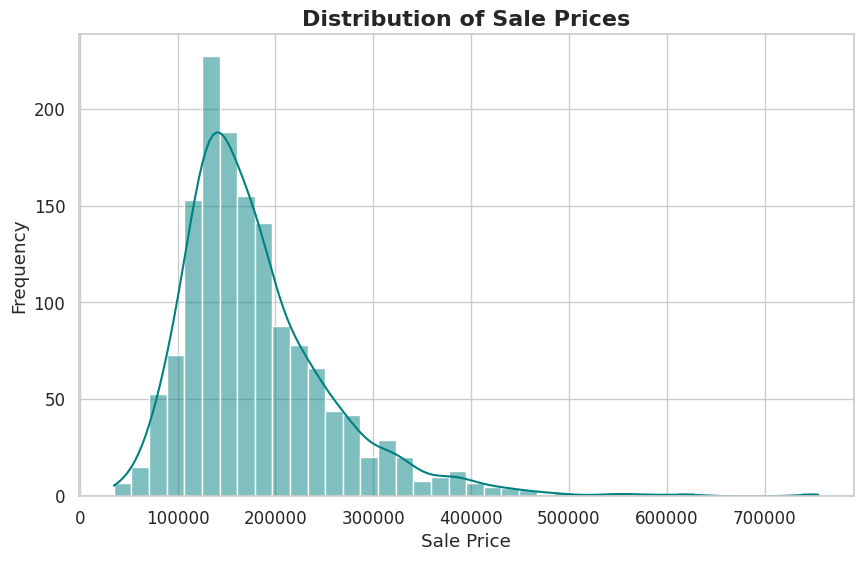

In [51]:
# ============================================================
# 1️⃣ Distribution of Sale Prices
# ============================================================
plt.figure(figsize=(10,6))
sns.histplot(house_df_encoded['SalePrice'], bins=40, kde=True, color='teal')
plt.title("Distribution of Sale Prices", fontsize=16, weight='bold')
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

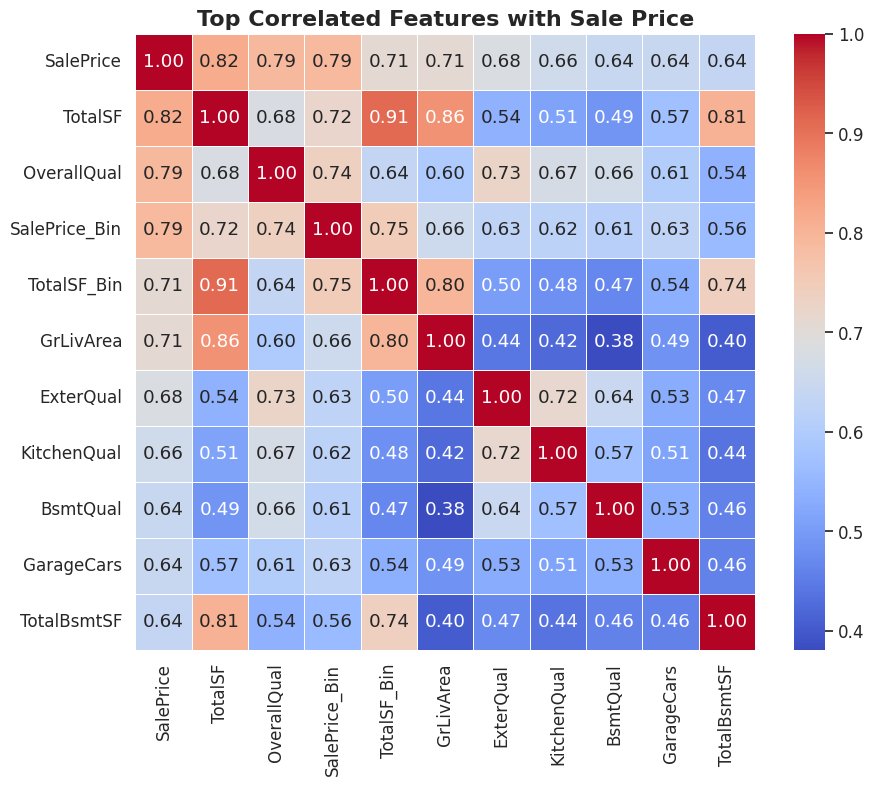

In [52]:
# ============================================================
# 2️⃣ Correlation Heatmap: Top 10 Numerical Features
# ============================================================

# Select numeric columns
num_df = house_df_encoded.select_dtypes(include='number')

# Compute correlation
corr = num_df.corr()

# Get top correlated features with SalePrice
top_corr_features = corr['SalePrice'].dropna().abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(house_df_encoded[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Top Correlated Features with Sale Price", fontsize=16, weight='bold')
plt.show()

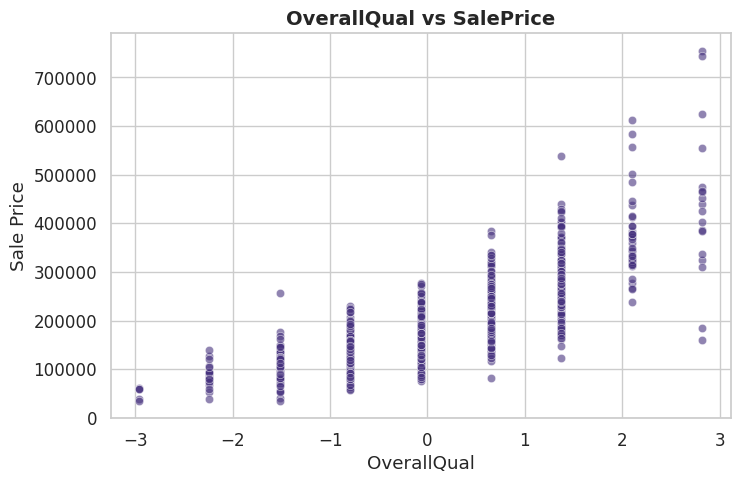

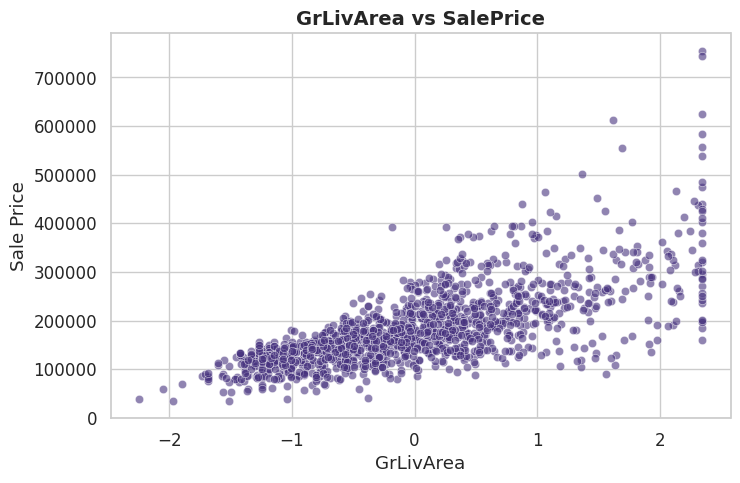

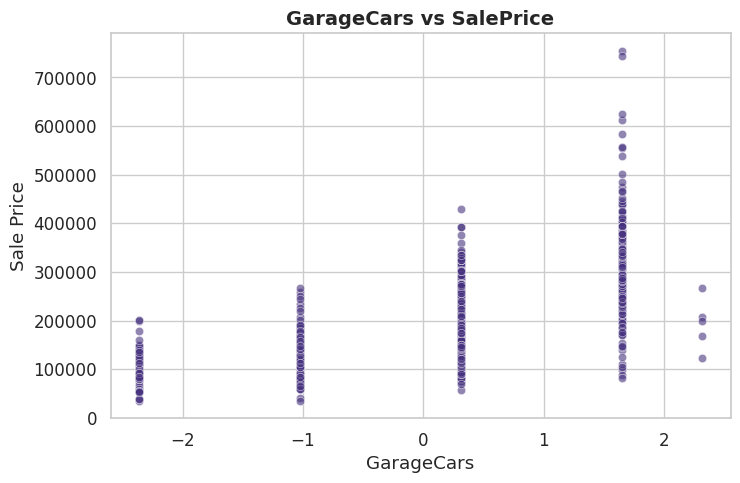

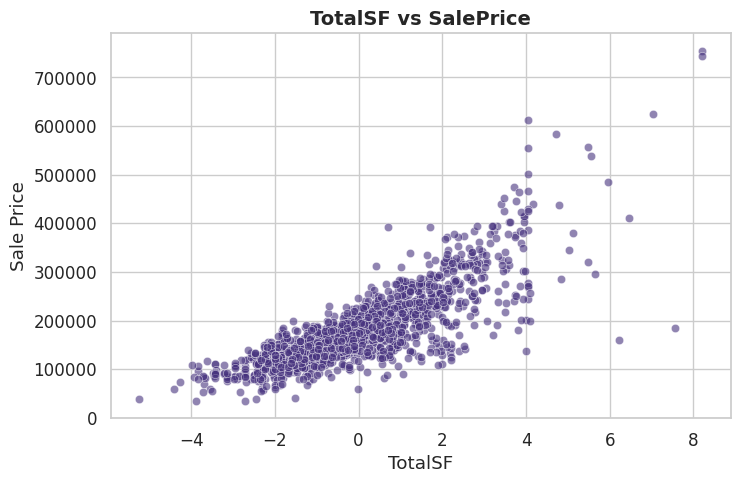

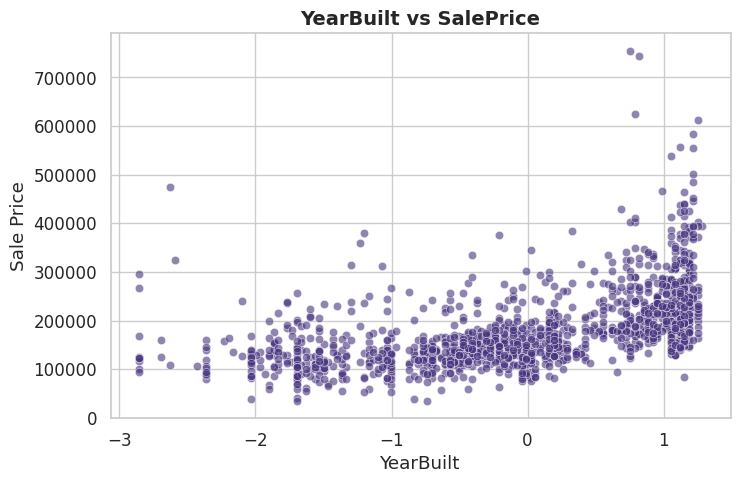

In [53]:
# ============================================================
# 3️⃣ Relationship between Key Features and Sale Price
# ============================================================

# Pick top numeric predictors (based on earlier correlation analysis)
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalSF', 'YearBuilt']
for col in important_features:
    if col in house_df_encoded.columns:
        plt.figure(figsize=(8,5))
        sns.scatterplot(x=house_df_encoded[col], y=house_df_encoded['SalePrice'], alpha=0.6)
        plt.title(f"{col} vs SalePrice", fontsize=14, weight='bold')
        plt.xlabel(col)
        plt.ylabel("Sale Price")
        plt.show()

##Task 4: Model Building and Evaluation

###4.1 Build models
Using XGBoost, LightGBM, and CatBoost to predict sale prices.

###4.2 Evaluate model performance
Using metrics such as RMSE, MAE, and R².